# Case Study: Medifor
This notebook looks at the differences between a train and test set, specifically the NC17 (train) and MFC18 (test) datasets.

In [1]:
import os
import sys
sys.path.insert(0, os.getcwd() + '/../')  # for scripts

from scripts.clustering import feature_clustering
from scripts.misclassification import misclassification
data_dir = '../../data'

/Users/Jonny/Documents/research/interpretability/classification/trees/myenv/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


## Feature Clustering
We can use tsne to visualize the domain mismatch in our high-dimensional medifor datasets. We'll take our train and test sets, concatenate them, extract the tree representation features, reduce their dimensionality using PCA, and then embed them into a 2D space using TSNE.

### NC17 (Original features)
We first plot the similarity between data points using the original feature space:

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.00380
train auroc: 1.000
test set acc: 0.945695
test log loss: 0.17230
test auroc: 0.985
concatenating X_train and X_test...
reducing dimensions from 72 to 50 with PCA...
embedding with tsne...


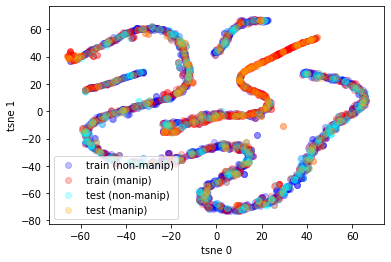

In [4]:
feature_clustering(model='lgb', encoding='None', dataset='NC17_EvalPart1', random_state=1, data_dir=data_dir)

### NC17 (Tree-extracted feature space)
Now we perform the same procedure, except this time with the tree-extracted feature representation:

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.00380
train auroc: 1.000
test set acc: 0.945695
test log loss: 0.17230
test auroc: 0.985
concatenating X_train and X_test...
exracting tree features...

Tree Explainer:
train shape: (3019, 72)
classes: [0 1]
linear_model: SVM(C=0.1, coef0=0.0, degree=3, gamma='scale', kernel='linear', pred_size=500,
    random_state=1)
encoding: leaf_output
dense_output: False
fit predicted labels: True
random state: 1

reducing dimensions from 100 to 50 with PCA...
embedding with tsne...


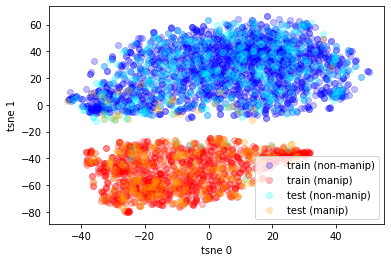

In [2]:
feature_clustering(model='lgb', encoding='leaf_output', dataset='NC17_EvalPart1', true_label=True,
                   linear_model='svm', kernel='linear', random_state=1, data_dir=data_dir)

### NC17 (Train) and MFC18 (Test)
Now we apply the same process to two slightly different datasets: NC17 (train) and MFC18 (test), where we can see there is a clear separation between the pos and negative classes for the training set, but not for the test set:

model (LGBMClassifier)
train set acc: 1.000000
train log loss: 0.02060
train auroc: 1.000
test set acc: 0.817634
test log loss: 0.58381
test auroc: 0.711
concatenating X_train and X_test...
exracting tree features...

Tree Explainer:
train shape: (3774, 36)
classes: [0 1]
linear_model: SVM(C=0.1, coef0=0.0, degree=3, gamma='scale', kernel='linear', pred_size=500,
    random_state=1)
encoding: leaf_output
dense_output: False
fit predicted labels: True
random state: 1

reducing dimensions from 100 to 50 with PCA...
embedding with tsne...


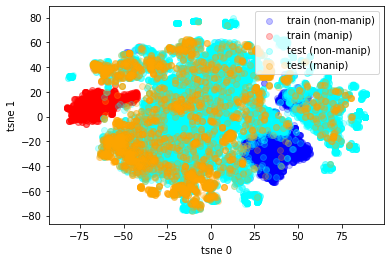

In [3]:
feature_clustering(model='lgb', encoding='leaf_output', dataset='nc17_mfc18', true_label=True,
                   linear_model='svm', kernel='linear', random_state=1, data_dir=data_dir)

## Understanding Misclassified Test Instances

In [ ]:
misclassification(model='lgb', dataset='nc17_mfc18', encoding='leaf_output',
                  linear_model='svm', kernel='linear', true_label=True, data_dir=data_dir, topk_test=2, topk_train=500)